# Robust Identification and Inference in Repeated Game

Antonio Cozzolino, Cristina Gualdani, Lorenzo Magnolfi, Niccolò Lomys

In [1]:
from RIIRG_lib import Robust_Identification
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
%matplotlib widget

Setup a grid point and call the class robust identification passing an empirical distribution of action profile

In [5]:
grid = 40
game = Robust_Identification([0.7, 0.1, 0.1, 0.1])

Call the identify function to run the identification

In [6]:
ID_set, B, Δ, H = game.identify(grid)

Plot of the identified set

Text(0.5, 0, '$\\eta$')

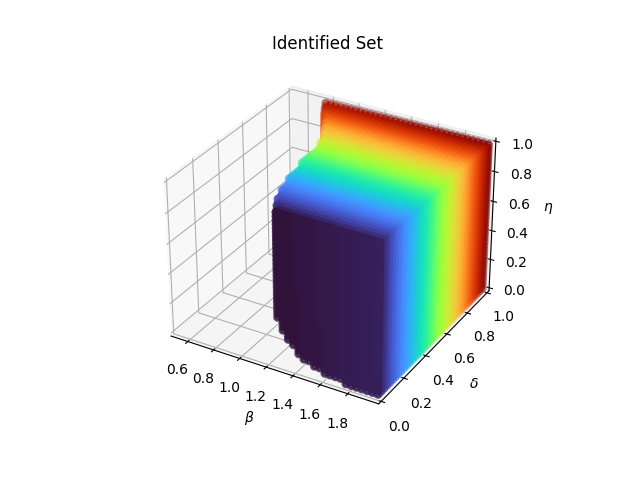

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.title("Identified Set")

# Color map
color_values = np.linspace(0, 1, int(np.sum(ID_set)))
cmap = plt.cm.turbo # Choose a colormap
norm = Normalize(vmin=color_values.min(), vmax=color_values.max())

# Plot
ax.scatter(B[ID_set.astype(bool)], Δ[ID_set.astype(bool)], H[ID_set.astype(bool)], c=color_values, cmap=cmap, norm=norm, linewidth=2)

ax.set_xlim([0.5, 1.99])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\delta$')
ax.set_zlabel(r'$\eta$')